<a href="https://colab.research.google.com/github/joimb9064/EAI_project_problems/blob/main/Q_Learning_Taxi_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install x11-utils
!apt-get install pyglet
!apt-get install -y xvfb python-openl
!apt-get install -y xvfb
!pip install gym pyvirtualdisplay
!pip install --upgrade tensorflow
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 x11-utils
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 318 kB of archives.
After this operation, 1,053 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxxf86dga1 amd64 2:1.1.5-0ubuntu3 [12.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-utils amd64 7.7+5build2 [206 kB]
Fetched

**2) Initializing the environment.**



In [ ]:
import gym

In [ ]:
env = gym.make("Taxi-v3").env


**1) Needs to be installed in google colab to make the code work.**




In [ ]:
env.reset()


407

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

**Added "import time" module because of the error KeyboardInterrupt.**

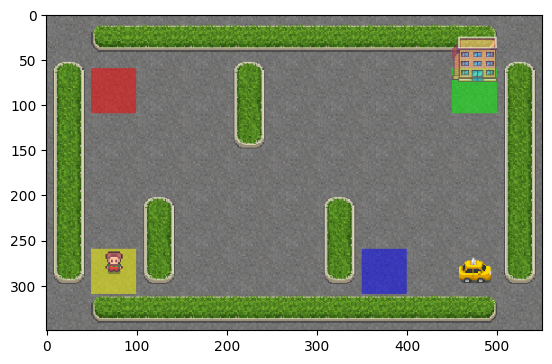

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for rendering
from IPython import display as ipythondisplay  # Importing IPython for display management
import gym  # Import gym for the environment
import time  # Import time to add a delay between frames

# Initialize the environment (replace with your desired environment, e.g., 'CartPole-v1')
env = gym.make('Taxi-v3')

# Reset the environment
env.reset()

# Render the initial frame
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# Loop through steps of the environment
for i in range(50):
    action = env.action_space.sample()  # Take a random action
    observation, reward, done, info = env.step(action)  # Step through the environment

    # Render the current frame
    screen = env.render(mode='rgb_array')

    # Display the frame using Matplotlib
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)  # Clear previous frame
    ipythondisplay.display(plt.gcf())  # Display the current frame

    # Add a small delay between frames (0.1 seconds)
    time.sleep(1)

    # If the episode is done, break the loop
    if done:
        break

# Clear the final output and close the environment
ipythondisplay.clear_output(wait=True)
env.close()





In [ ]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
state= env.encode(3,1,2,0)
print("State :", state)
env.s = state


Action Space Discrete(6)
State Space Discrete(500)
State : 328


In [ ]:
env.P[328]


{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [ ]:
env.s = 328
epochs = 0

penalties, rewards = 0,0
frames =[]
done = False

while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if reward == -10:
    penalties += 1

  frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'action': action,
          'reward': reward,
          'penalties': penalties

      }
  )

  epochs += 1

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 150
Penalties incurred: 50


In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Penalties: {frame['penalties']}")  # Display penalties
        sleep(1)  # Set delay to 1 second

print_frames(frames)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | :_|
|Y| : |B: |
+---------+
  (East)

Timestep: 150
State: 398
Action: 2
Reward: -1
Penalties: 49


In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])




```
# This is formatted as code
```

**Grid Search on what are the best hyperparameters**


In [ ]:
import random
import numpy as np
from IPython.display import clear_output
import gym

# Hyperparameter grid for alpha, gamma, and epsilon
alpha_grid = [0.1, 0.2, 0.3, 0.4, 0.5]
gamma_grid = [0.6, 0.7, 0.8, 0.9, 0.99]
epsilon_grid = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize the environment
env = gym.make('Taxi-v3')

# Function to run Q-learning with specific hyperparameters
def q_learning(alpha, gamma, epsilon, episodes=10000):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    total_epochs, total_penalties = 0, 0

    for i in range(1, episodes + 1):
        state = env.reset()
        epochs, penalties, reward = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore action space
            else:
                action = np.argmax(q_table[state])  # Exploit learned values

            next_state, reward, done, info = env.step(action)

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

            if reward == -10:  # Penalty for illegal moves
                penalties += 1

            state = next_state
            epochs += 1

        total_penalties += penalties
        total_epochs += epochs

    return total_epochs / episodes, total_penalties / episodes  # Average timesteps and penalties

# Grid search loop
best_params = None
best_score = float('inf')
results = []

for alpha in alpha_grid:
    for gamma in gamma_grid:
        for epsilon in epsilon_grid:
            print(f"Testing alpha={alpha}, gamma={gamma}, epsilon={epsilon}")
            avg_epochs, avg_penalties = q_learning(alpha, gamma, epsilon)
            score = avg_epochs  # Define score as the average timesteps to solve episodes
            results.append((alpha, gamma, epsilon, score, avg_penalties))

            if score < best_score:
                best_score = score
                best_params = (alpha, gamma, epsilon)

# Display the best parameters and their score
print(f"Best parameters: alpha={best_params[0]}, gamma={best_params[1]}, epsilon={best_params[2]} with score={best_score}")


Testing alpha=0.1, gamma=0.6, epsilon=0.1
Testing alpha=0.1, gamma=0.6, epsilon=0.2
Testing alpha=0.1, gamma=0.6, epsilon=0.3
Testing alpha=0.1, gamma=0.6, epsilon=0.4
Testing alpha=0.1, gamma=0.6, epsilon=0.5
Testing alpha=0.1, gamma=0.7, epsilon=0.1
Testing alpha=0.1, gamma=0.7, epsilon=0.2
Testing alpha=0.1, gamma=0.7, epsilon=0.3
Testing alpha=0.1, gamma=0.7, epsilon=0.4
Testing alpha=0.1, gamma=0.7, epsilon=0.5
Testing alpha=0.1, gamma=0.8, epsilon=0.1
Testing alpha=0.1, gamma=0.8, epsilon=0.2
Testing alpha=0.1, gamma=0.8, epsilon=0.3
Testing alpha=0.1, gamma=0.8, epsilon=0.4
Testing alpha=0.1, gamma=0.8, epsilon=0.5
Testing alpha=0.1, gamma=0.9, epsilon=0.1
Testing alpha=0.1, gamma=0.9, epsilon=0.2
Testing alpha=0.1, gamma=0.9, epsilon=0.3
Testing alpha=0.1, gamma=0.9, epsilon=0.4
Testing alpha=0.1, gamma=0.9, epsilon=0.5
Testing alpha=0.1, gamma=0.99, epsilon=0.1
Testing alpha=0.1, gamma=0.99, epsilon=0.2
Testing alpha=0.1, gamma=0.99, epsilon=0.3
Testing alpha=0.1, gamma=0.99, 

**Training the Agent**

In [ ]:
%%time
"""Training the agent using Q-learning"""
import random
import numpy as np
from IPython.display import clear_output
import gym

# Initialize the environment (e.g., 'Taxi-v3') with new step API enabled
env = gym.make('Taxi-v3', new_step_api=True)

# Initialize Q-table (state space x action space)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.5  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration factor

# For plotting metrics
all_epochs = []
all_penalties = []

# Training loop
for i in range(1, 100001):
    state = env.reset()  # Reset the environment and get the initial state (no need to index)
    epochs, penalties, reward = 1, 1, 0
    done = False

    while not done:
        # Choose action (epsilon-greedy strategy)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        # Take the action and observe the next state and reward
        next_state, reward, done, truncated, info = env.step(action)

        # Print all the values returned by env.step()
        #print(f"Next State: {next_state}, Reward: {reward}, Done: {done}, Truncated: {truncated}, Info: {info}")

        # Q-learning update
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        # Track penalties
        if reward == -10:
            penalties += 1

        # Move to the next state
        state = next_state
        epochs += 1

    # Print progress every 100 episodes
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


**Evaluating the Agent**


In [ ]:
"""Evaluate agent's performance after Q-learning"""
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()  # Reset the environment
    epochs, penalties, reward = 0, 0, 0
    done = False

    while not done:
        action = np.argmax(q_table[state])  # Choose the best action based on Q-table
        state, reward, done,truncated, info = env.step(action)  # Take the action and observe the result

        # Check if the agent received a penalty
        if reward == -10:
            penalties += 1

        epochs += 1  # Count the number of steps in the episode

    total_penalties += penalties  # Track total penalties across episodes
    total_epochs += epochs  # Track total epochs across episodes

# Print the evaluation results
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")


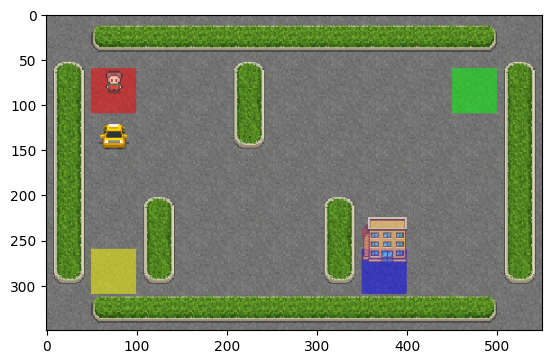

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for rendering
from IPython import display as ipythondisplay  # Importing IPython for display management
import gym  # Import gym for the environment
import time  # Import time to add a delay between frames

# Initialize the environment (replace with your desired environment, e.g., 'CartPole-v1')
env = gym.make('Taxi-v3')

# Reset the environment
env.reset()

# Render the initial frame
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# Loop through steps of the environment
for i in range(100):
    action = env.action_space.sample()  # Take a random action
    state, penalty, done, info = env.step(action)  # Step through the environment

    # Render the current frame
    screen = env.render(mode='rgb_array')

    # Display the frame using Matplotlib
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)  # Clear previous frame
    ipythondisplay.display(plt.gcf())  # Display the current frame

    # Add a small delay between frames (0.1 seconds)
    time.sleep(0.1)

    # If the episode is done, break the loop
    if done:
        break

# Clear the final output and close the environment
ipythondisplay.clear_output(wait=True)
env.close()


**Train Agent and Save the data to Google Colab**

In [ ]:
import random
import numpy as np
from IPython.display import clear_output
import gym
from google.colab import drive, files
from datetime import datetime

# Initialize the environment (e.g., 'Taxi-v3') with new step API enabled
env = gym.make('Taxi-v3', new_step_api=True)

# Initialize Q-table (state space x action space)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.8  # Discount factor
epsilon = 0.5  # Exploration factor

# Training loop
for i in range(1, 100001):
    state = env.reset()  # Reset the environment and get the initial state
    epochs, penalties, reward = 0, 0, 0
    done = False

    while not done:
        # Choose action (epsilon-greedy strategy)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        # Take the action and observe the next state and reward
        next_state, reward, done, truncated, info = env.step(action)

        # Q-learning update
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        # Track penalties
        if reward == -10:
            penalties += 1

        # Move to the next state
        state = next_state
        epochs += 1

    # Print progress every 100 episodes
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

# Get the current time and date for filename
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# Mount Google Drive
drive.mount('/content/drive')

# Save the Q-table with a timestamped filename
filename = f'/content/drive/MyDrive/q_table_{timestamp}.npy'
np.save(filename, q_table)
print(f"Q-table saved to Google Drive at {filename}")

# Optionally, download the Q-table to your local machine
files.download(filename)


**Use the trained data from my Google Colab**

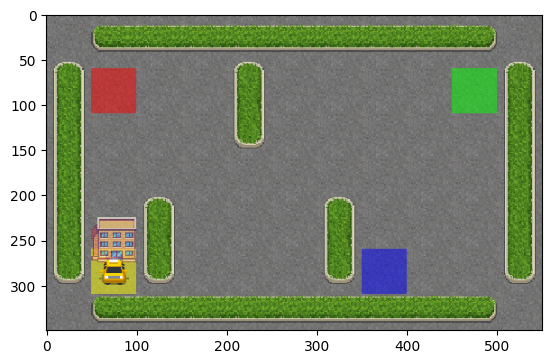

In [ ]:
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import gym
import time
import numpy as np
from google.colab import drive

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Load the trained Q-table from Google Drive
q_table = np.load('/content/drive/MyDrive/q_table_2024-10-06_16-53-24.npy')  # Replace with the correct file name

# Initialize the Taxi environment
env = gym.make('Taxi-v3')

# Reset the environment and get the initial state
state = env.reset()

# Render the initial frame
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# Loop through steps of the environment using the trained Q-table
for i in range(100):
    # Use the Q-table to select the best action based on the current state
    action = np.argmax(q_table[state])  # Choose action based on trained Q-table

    # Take the action and observe the result
    state, reward, done, info = env.step(action)

    # Render the current frame
    screen = env.render(mode='rgb_array')

    # Display the frame using Matplotlib
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)  # Clear previous frame
    ipythondisplay.display(plt.gcf())  # Display the current frame

    # Add a small delay between frames (0.1 seconds)
    time.sleep(1)

    # If the episode is done, break the loop
    if done:
        break

# Clear the final output and close the environment
ipythondisplay.clear_output(wait=True)
env.close()


**Checking the result through frames**

In [ ]:
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import gym
import time
import numpy as np
from google.colab import drive
from IPython.display import clear_output
from time import sleep

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Load the trained Q-table from Google Drive
q_table = np.load('/content/drive/MyDrive/q_table_2024-10-06_16-53-24.npy')  # Replace with the correct file name

# Initialize the Taxi environment
env = gym.make('Taxi-v3')

# Function to display the frames
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Penalties: {frame['penalties']}")  # Display penalties
        sleep(1)  # Set delay to 1 second

# Reset the environment and get the initial state
state = env.reset()

# Store frames for rendering
frames = []

# Loop through steps of the environment using the trained Q-table
penalties = 0
for i in range(100):
    # Use the Q-table to select the best action based on the current state
    action = np.argmax(q_table[state])  # Choose action based on trained Q-table

    # Take the action and observe the result
    next_state, reward, done, info = env.step(action)

    # Track penalties
    if reward == -10:
        penalties += 1

    # Store the frame information
    frames.append({
        'frame': env.render(mode='ansi'),  # Render as text
        'state': next_state,
        'action': action,
        'reward': reward,
        'penalties': penalties
    })

    # Move to the next state
    state = next_state

    # Break if the episode is done
    if done:
        break

# Output the frames with the trained data and 1-second delay between frames
print_frames(frames)

# Close the environment
env.close()


**Deep Q-Network (DQN)**
Training the agent using DQN using pytorch.

In [6]:
import os
import sys
import gym
import time
import numpy as np
import pandas as pd
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from google.colab import drive
from datetime import datetime
from itertools import count


# Mount Google Drive
drive.mount('/content/drive')

# Define DQN Models
class DQN(nn.Module):
    def __init__(self, input: int, outputs: int):
        super(DQN, self).__init__()
        self.emb = nn.Embedding(input, 4)
        self.l1 = nn.Linear(4, 50)
        self.l2 = nn.Linear(50, 50)
        self.l3 = nn.Linear(50, outputs)

    def forward(self, x):
        x = F.relu(self.l1(self.emb(x)))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

class DQN_2(nn.Module):
    def __init__(self, input: int, outputs: int):
        super(DQN_2, self).__init__()
        self.emb = nn.Embedding(input, 6)
        self.l1 = nn.Linear(6, 50)
        self.l2 = nn.Linear(50, 50)
        self.l3 = nn.Linear(50, 100)
        self.l4 = nn.Linear(100, outputs)

    def forward(self, x):
        x = F.relu(self.l1(self.emb(x)))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = self.l4(x)
        return x

# Define Transition for Replay Memory
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ReplayMemory:
    def __init__(self, capacity: int):
        self.memory = deque(maxlen=capacity)

    def push(self, *args):
        """Saves a transition."""
        self.memory.append(Transition(*args))

    def sample(self, batch_size: int):
        """Samples a batch of transitions."""
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

class TrainingAgent():
    def __init__(self,
                 env=gym.make("Taxi-v3").env,
                 batch_size: int = 128,
                 gamma: float = 0.99,
                 eps_start: float = 1,
                 eps_end: float = 0.1,
                 eps_decay: float = 400,
                 target_update: int = 20,
                 max_steps_per_episode: int = 100,
                 warmup_episode: int = 10,
                 save_freq: int = 1000,
                 lr: float = 0.001,
                 lr_min: float = 0.0001,
                 lr_decay: int = 5000,
                 memory_size: int = 50000,
                 num_episodes: int = 10000,
                 name: str = None,
                 architecture: int = 2,
                 save: bool = True) -> None:

        self.config = {
            "BATCH_SIZE": batch_size,
            "GAMMA": gamma,
            "EPS_START": eps_start,
            "EPS_END": eps_end,
            "EPS_DECAY": eps_decay,
            "TARGET_UPDATE": target_update,
            "MAX_STEPS_PER_EPISODE": max_steps_per_episode,
            "WARMUP_EPISODE": warmup_episode,
            "SAVE_FREQ": save_freq,
            "LR": lr,
            "LR_MIN": lr_min,
            "LR_DECAY": lr_decay,
            "MEMORY_SIZE": memory_size,
            "NUM_EPISODES": num_episodes,
            "SHOULD_WARMUP": True
        }

        self.save_fig = save
        self.episode_durations = []
        self.reward_in_episode = []
        self.epsilon_vec = []

        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.env = env
        self.id = int(time.time()) if name is None else name
        self.rng = np.random.default_rng(123)
        self.architecture = architecture
        self.memory = ReplayMemory(self.config["MEMORY_SIZE"])

    def print_model_info(self) -> None:
        print("Model Initialized with params:")
        for key, value in self.config.items():
            print(f" - {key}: {value}")

    def compile(self) -> None:
        n_actions = self.env.action_space.n
        n_observations = self.env.observation_space.n
        self.model = DQN(n_observations, n_actions).to(self.device) if self.architecture == 1 else DQN_2(n_observations, n_actions).to(self.device)
        self.target_model = DQN(n_observations, n_actions).to(self.device) if self.architecture == 1 else DQN_2(n_observations, n_actions).to(self.device)
        self.target_model.load_state_dict(self.model.state_dict())
        self.target_model.eval()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.config["LR"])

    def _get_epsilon(self, episode: int) -> float:
        epsilon = self.config["EPS_END"] + (self.config["EPS_START"] - self.config["EPS_END"]) * np.exp(-episode / self.config["EPS_DECAY"])
        return epsilon

    def _get_action_for_state(self, state: int):
        with torch.no_grad():
            predicted = self.model(torch.tensor([state], device=self.device))
            action = predicted.max(1)[1]
        return action.item()

    def _choose_action(self, state: int, epsilon: float) -> int:
        if self.rng.uniform() < epsilon:
            action = self.env.action_space.sample()
        else:
            action = self._get_action_for_state(state)
        return action

    def _remember(self, state: int, action: int, next_state: int, reward: int, done: bool) -> None:
        self.memory.push(torch.tensor([state], device=self.device), torch.tensor([action], device=self.device, dtype=torch.long), torch.tensor([next_state], device=self.device), torch.tensor([reward], device=self.device), torch.tensor([done], device=self.device, dtype=torch.bool))

    def _train_model(self) -> None:
        if len(self.memory) < self.config["BATCH_SIZE"]:
            return
        transitions = self.memory.sample(self.config["BATCH_SIZE"])
        batch = Transition(*zip(*transitions))

        state_batch = torch.cat(batch.state)
        action_batch = torch.cat(batch.action)
        reward_batch = torch.cat(batch.reward)
        next_state_batch = torch.cat(batch.next_state)
        done_batch = torch.cat(batch.done)

        predicted_q_value = self.model(state_batch).gather(1, action_batch.unsqueeze(1))
        next_state_values = self.target_model(next_state_batch).max(1)[0]
        expected_q_values = (~done_batch * next_state_values * self.config["GAMMA"]) + reward_batch

        loss = F.smooth_l1_loss(predicted_q_value, expected_q_values.unsqueeze(1))

        self.optimizer.zero_grad()
        loss.backward()
        for param in self.model.parameters():
            param.grad.data.clamp_(-1, 1)

        self.optimizer.step()

    def _update_target(self) -> None:
        self.target_model.load_state_dict(self.model.state_dict())

    def fit(self) -> None:
        episode_done = len(self.episode_durations)
        epsilon = 1 if self.config["SHOULD_WARMUP"] else self.epsilon_vec[-1]
        start = time.time()

        for i_episode in range(self.config["NUM_EPISODES"] - episode_done):
            state = self.env.reset()
            reward_in_episode = 0  # Reset the reward for the episode here

            if i_episode >= self.config["WARMUP_EPISODE"] and self.config["SHOULD_WARMUP"]:
                epsilon = self._get_epsilon(i_episode - self.config["WARMUP_EPISODE"])
            elif not self.config["SHOULD_WARMUP"]:
                epsilon = self._get_epsilon(len(self.episode_durations) - self.config["WARMUP_EPISODE"])

            for step in count():
                action = self._choose_action(state, epsilon)

                # Unpack the values based on the expected return format
                result = self.env.step(action)  # Capture next_state, reward, done, and any additional info

                # Unpack based on the number of values returned
                if len(result) == 4:
                    next_state, reward, done, _ = result  # 4 values
                elif len(result) == 5:
                    next_state, reward, done, _, _ = result  # 5 values
                elif len(result) == 3:
                    next_state, reward, done = result  # 3 values
                else:
                    raise ValueError(f"Unexpected number of values returned by env.step: {len(result)}")

                self._remember(state, action, next_state, reward, done)

                if i_episode >= self.config["WARMUP_EPISODE"] or not self.config["SHOULD_WARMUP"]:
                    self._train_model()

                state = next_state
                reward_in_episode += reward

                if done:
                    self.episode_durations.append(step + 1)
                    self.reward_in_episode.append(reward_in_episode)  # Store the total reward for this episode
                    self.epsilon_vec.append(epsilon)

                    # Print the metrics at the end of the episode
                    print(f"Episode: {i_episode + 1}, Total Reward: {reward_in_episode}, Steps: {step + 1}, Epsilon: {epsilon:.2f}")

                    break

            if i_episode % self.config["TARGET_UPDATE"] == 0:
                self._update_target()

            if i_episode % self.config["SAVE_FREQ"] == 0:
                self.save()

        self.save()

    def save(self) -> None:
        current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
        model_name = f"DQN_{current_time}_taxi_v3.pt"
        model_path = f"/content/drive/My Drive/{model_name}"

        torch.save({
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            "reward_in_episode": self.reward_in_episode,
            "episode_durations": self.episode_durations,
            "epsilon_vec": self.epsilon_vec,
            "config": self.config,
            "architecture": self.architecture
        }, model_path)
        print(f"Model saved to {model_path}")

# Initialize and run the agent
if __name__ == "__main__":
    env = gym.make("Taxi-v3", new_step_api=True).env
    batch_size = 128
    gamma = 0.99
    eps_start = 1.0
    eps_end = 0.1
    eps_decay = 400
    target_update = 20
    max_steps_per_episode = 100
    warmup_episode = 10
    save_freq = 1000
    lr = 0.001
    lr_min = 0.0001
    lr_decay = 5000
    memory_size = 50000
    num_episodes = 10000
    architecture = 2

    agent = TrainingAgent(env=env,
                          batch_size=batch_size,
                          gamma=gamma,
                          eps_start=eps_start,
                          eps_end=eps_end,
                          eps_decay=eps_decay,
                          target_update=target_update,
                          max_steps_per_episode=max_steps_per_episode,
                          warmup_episode=warmup_episode,
                          save_freq=save_freq,
                          lr=lr,
                          lr_min=lr_min,
                          lr_decay=lr_decay,
                          memory_size=memory_size,
                          num_episodes=num_episodes,
                          architecture=architecture)

    agent.compile()
    agent.print_model_info()
    agent.fit()


Streaming output truncated to the last 5000 lines.
Episode: 5006, Total Reward: 5, Steps: 16, Epsilon: 0.10
Episode: 5007, Total Reward: 8, Steps: 13, Epsilon: 0.10
Episode: 5008, Total Reward: -3, Steps: 15, Epsilon: 0.10
Episode: 5009, Total Reward: 5, Steps: 16, Epsilon: 0.10
Episode: 5010, Total Reward: 6, Steps: 15, Epsilon: 0.10
Episode: 5011, Total Reward: 8, Steps: 13, Epsilon: 0.10
Episode: 5012, Total Reward: -13, Steps: 16, Epsilon: 0.10
Episode: 5013, Total Reward: 15, Steps: 6, Epsilon: 0.10
Episode: 5014, Total Reward: 8, Steps: 13, Epsilon: 0.10
Episode: 5015, Total Reward: 11, Steps: 10, Epsilon: 0.10
Episode: 5016, Total Reward: 9, Steps: 12, Epsilon: 0.10
Episode: 5017, Total Reward: 7, Steps: 14, Epsilon: 0.10
Episode: 5018, Total Reward: 4, Steps: 17, Epsilon: 0.10
Episode: 5019, Total Reward: 4, Steps: 17, Epsilon: 0.10
Episode: 5020, Total Reward: 7, Steps: 14, Epsilon: 0.10
Episode: 5021, Total Reward: 8, Steps: 13, Epsilon: 0.10
Episode: 5022, Total Reward: -6, 

Instructions to Use the Code
Mount Google Drive: Make sure your Google Drive is mounted correctly in Colab. You should see a prompt to allow access.

Specify Model Path:

Replace "/content/drive/My Drive/DQN_YYYYMMDD-HHMMSS_taxi_v3.pt" with the actual path of your trained model in Google Drive.
Run the Code: Execute the entire code block in your Colab notebook.

Playing the Game
The model will be loaded, and the game will be played using the DQN agent with the specified number of maximum steps (set to 100 by default).
If render=True, the environment will be displayed visually during the play session.
Additional Notes
Ensure that the model path is correct and points to a valid DQN model file.
You can adjust max_steps and render parameters in the play function call if needed.

Total Reward: 8


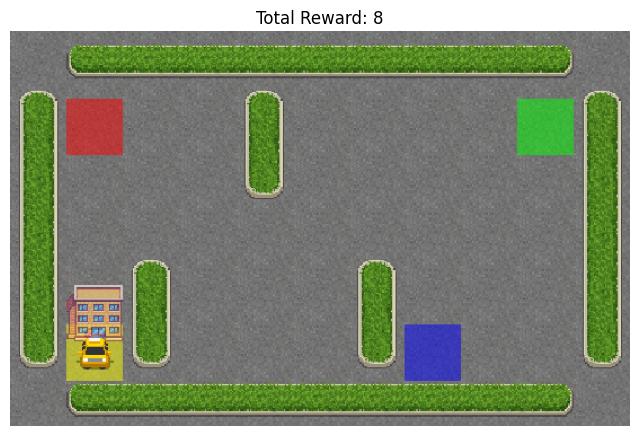

In [ ]:
import os
import sys
import gym
import time
import numpy as np
import pandas as pd
from collections import namedtuple, deque
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from google.colab import drive
from IPython import display as ipythondisplay

# Mount Google Drive
drive.mount('/content/drive')

# Define DQN Models
class DQN(nn.Module):
    def __init__(self, input: int, outputs: int):
        super(DQN, self).__init__()
        self.emb = nn.Embedding(input, 4)
        self.l1 = nn.Linear(4, 50)
        self.l2 = nn.Linear(50, 50)
        self.l3 = nn.Linear(50, outputs)

    def forward(self, x):
        x = F.relu(self.l1(self.emb(x)))
        x = F.relu(self.l2(x))
        x = self.l3(x)
        return x

class DQN_2(nn.Module):
    def __init__(self, input: int, outputs: int):
        super(DQN_2, self).__init__()
        self.emb = nn.Embedding(input, 6)
        self.l1 = nn.Linear(6, 50)
        self.l2 = nn.Linear(50, 50)
        self.l3 = nn.Linear(50, 100)
        self.l4 = nn.Linear(100, outputs)

    def forward(self, x):
        x = F.relu(self.l1(self.emb(x)))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = self.l4(x)
        return x

# Define Transition for Replay Memory
Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward', 'done'))

class ReplayMemory:
    def __init__(self, capacity: int):
        self.memory = deque(maxlen=capacity)

    def push(self, *args):
        """Saves a transition."""
        self.memory.append(Transition(*args))

    def sample(self, batch_size: int):
        """Samples a batch of transitions."""
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

# Load a specific trained model
def import_model(path: str) -> tuple:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    checkpoint = torch.load(path)

    n_actions = env.action_space.n
    n_observation = env.observation_space.n

    # Select model architecture based on the checkpoint
    if checkpoint.get("architecture") == 1:
        model = DQN(n_observation, n_actions).to(device)
    else:
        model = DQN_2(n_observation, n_actions).to(device)

    optimizer = optim.Adam(model.parameters())

    # Load the state dict into the model
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    return optimizer, model, device

# Function to get action for state
def get_action_for_state(state: int, model, device) -> int:
    with torch.no_grad():
        predicted = model(torch.tensor([state], device=device))
        action = predicted.max(1)[1]
    return action.item()

# Function to play the game with the loaded model and display it on a single frame
def play(env, model, device, max_steps=100, render=True):
    state = env.reset()
    done = False
    total_reward = 0

    # Initialize the figure for displaying frames
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots(figsize=(8, 8))

    while not done and total_reward < max_steps:
        action = get_action_for_state(state, model, device)
        state, reward, done, _ = env.step(action)  # Adjust based on your version of gym
        total_reward += reward

        # Render the frame
        screen = env.render(mode='rgb_array')

        # Display the frame using Matplotlib
        ax.clear()
        ax.imshow(screen)
        ax.axis('off')  # Hide the axes
        plt.title(f'Total Reward: {total_reward}')
        ipythondisplay.clear_output(wait=True)  # Clear previous frame
        ipythondisplay.display(plt.gcf())  # Display the current frame

        # Add a small delay between frames (0.1 seconds)
        time.sleep(1)

    # Clear the output to remove the last frame display
    ipythondisplay.clear_output(wait=True)  # Clear output once more to avoid final frame lingering
    #plt.close(fig)  # Close the figure window
    return total_reward

# Initialize and run the agent
if __name__ == "__main__":
    # Set the path to your saved model
    model_path = "/content/drive/My Drive/DQN_20241017-172511_taxi_v3.pt"  # Change to your actual path

    # Create the environment
    env = gym.make("Taxi-v3").env

    # Load the model
    optimizer, model, device = import_model(model_path)

    # Play the game with the loaded model
    total_reward = play(env, model, device, max_steps=100, render=True)
    print(f"Total Reward: {total_reward}")


**SARSA Reinforcement Learning code:**


In [ ]:
# Install necessary libraries (if not already installed)
# Uncomment if you need to install any missing packages
# !pip install gym matplotlib numpy

import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import matplotlib
import time
import gym
from IPython import display as ipythondisplay
from google.colab import drive  # Import Google Drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to calculate moving average (not used in this version)
def moving_average(x: list, periods: int = 5) -> list:
    if len(x) < periods:
        return x

    cumsum = np.cumsum(np.insert(x, 0, 0))
    res = (cumsum[periods:] - cumsum[:-periods]) / periods
    return np.hstack([x[:periods - 1], res])

# Function to plot durations (commented out)
def plot_durations(episode_durations: list,
                   reward_in_episode: list,
                   epsilon_vec: list,
                   max_steps_per_episode: int = 100) -> None:
    '''Plot graphs containing Epsilon, Rewards, and Steps per episode over time'''
    lines = []
    fig = plt.figure(1, figsize=(15, 7))
    plt.clf()
    ax1 = fig.add_subplot(111)

    plt.title(f'Training...')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Duration & Rewards')
    ax1.set_ylim(-2 * max_steps_per_episode, max_steps_per_episode + 10)
    ax1.plot(episode_durations, color="C1", alpha=0.2)
    ax1.plot(reward_in_episode, color="C2", alpha=0.2)
    mean_steps = moving_average(episode_durations, periods=5)
    mean_reward = moving_average(reward_in_episode, periods=5)
    lines.append(ax1.plot(mean_steps, label="steps", color="C1")[0])
    lines.append(ax1.plot(mean_reward, label="rewards", color="C2")[0])

    ax2 = ax1.twinx()
    ax2.set_ylabel('Epsilon')
    lines.append(ax2.plot(epsilon_vec, label="epsilon", color="C3")[0])
    labs = [l.get_label() for l in lines]
    ax1.legend(lines, labs, loc=3)

    ipythondisplay.clear_output(wait=True)  # Clear previous output
    ipythondisplay.display(plt.gcf())  # Display the current frame
    plt.pause(0.001)

# Train function
def train(env=gym.make("Taxi-v3"),
          episodes=2000,
          gamma=0.95,
          epsilon=1,
          max_epsilon=1,
          min_epsilon=0.001,
          epsilon_decay=0.01,
          alpha=0.85):

    start_date = datetime.now()
    start_time = time.time()
    total_reward = []
    steps_per_episode = []
    epsilon_vec = []

    Q = np.zeros((env.observation_space.n, env.action_space.n))

    print("{} - Starting Training...\n".format(start_date))

    for e in range(episodes):
        done = False
        total_reward.append(0)
        steps_per_episode.append(0)
        state1 = env.reset()

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay * e)
        epsilon_vec.append(epsilon)

        if np.random.uniform(0, 1) < epsilon:
            action1 = env.action_space.sample()
        else:
            action1 = np.argmax(Q[state1, :])

        while not done:
            state2, reward, done, _ = env.step(action1)
            total_reward[e] += reward
            steps_per_episode[e] += 1
            if np.random.uniform(0, 1) < epsilon:
                action2 = env.action_space.sample()
            else:
                action2 = np.argmax(Q[state2, :])

            predict = Q[state1, action1]
            target = reward + gamma * Q[state2, action2]
            Q[state1, action1] += alpha * (target - predict)

            state1 = state2
            action1 = action2

        if e % int(episodes / 100) == 0:
            episode_time = (time.time() - start_time)
            print(
                "[EPISODE {}/{}] - Mean reward for last {} Episodes: {} in {} steps - Mean Time Per Episode: {}"
                .format(e, episodes, int(episodes / 100),
                        np.mean(total_reward[-int(episodes / 100):]),
                        np.mean(steps_per_episode[-int(episodes / 100):]),
                        np.round(episode_time / (e + 1), 6) if e != 0 else 0))

    end_date = datetime.now()
    execution_time = (time.time() - start_time)

    # Commented out plotting function call
    # plot_durations(steps_per_episode, total_reward, epsilon_vec)

    print()
    print("{} - Training Ended".format(end_date))
    print("Mean Reward: {}".format(np.mean(total_reward)))
    print("Time to train: \n    - {}s\n    - {}min\n    - {}h".format(
        np.round(execution_time, 2), np.round(execution_time / 60, 2),
        np.round(execution_time / 3600, 2)))
    print("Mean Time Per Episode: {}".format(
        np.round(execution_time / len(total_reward), 6)))

    # Save the Q-table with the specified format
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    path_table = f"/content/drive/My Drive/SARSA_Taxi_v3_{timestamp}.npy"
    #path_graph = f"/content/drive/My Drive/SARSA_Taxi_v3_graph_{timestamp}.png"

    np.save(path_table, Q)
    print(f"Saved Q-table as: {path_table}")  # Print the saved model path
    #plt.savefig(path_graph)  # This line is commented out

    return np.round(execution_time, 2), np.mean(total_reward)

# Initialize parameters for training
episodes = 10000
epsilon = 1
max_epsilon = 1
gamma = 0.99
min_epsilon = 0.001
epsilon_decay = 0.01
alpha = 0.85

# Create the environment
env = gym.make("Taxi-v3")

# Run training
train(env, episodes, gamma, epsilon, max_epsilon, min_epsilon, epsilon_decay, alpha)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2024-10-18 17:32:20.755358 - Starting Training...

[EPISODE 0/10000] - Mean reward for last 100 Episodes: -821.0 in 200.0 steps - Mean Time Per Episode: 0
[EPISODE 100/10000] - Mean reward for last 100 Episodes: -570.9 in 187.47 steps - Mean Time Per Episode: 0.005131
[EPISODE 200/10000] - Mean reward for last 100 Episodes: -284.29 in 148.21 steps - Mean Time Per Episode: 0.004273
[EPISODE 300/10000] - Mean reward for last 100 Episodes: -88.02 in 68.85 steps - Mean Time Per Episode: 0.003292
[EPISODE 400/10000] - Mean reward for last 100 Episodes: -29.53 in 38.23 steps - Mean Time Per Episode: 0.002785
[EPISODE 500/10000] - Mean reward for last 100 Episodes: -0.51 in 18.99 steps - Mean Time Per Episode: 0.002345
[EPISODE 600/10000] - Mean reward for last 100 Episodes: -0.02 in 19.67 steps - Mean Time Per Episode: 0.002028
[EPISODE 700/10000] - Mean reward for

(5.1, -4.3319)

*** SARSA_trained.py script***

The code is made in order to run the trained model of SARSA.


***How to use the script?***

Modifying the Code
Copy the following modified code that allows you to run the SARSA agent in Google Colab. This code includes the necessary adjustments to load the Q-table from your Google Drive.

`MODEL_PATH = "/content/drive/My Drive/SARSA_Taxi_v3_20241018_154311.npy  # Update the path to your file`


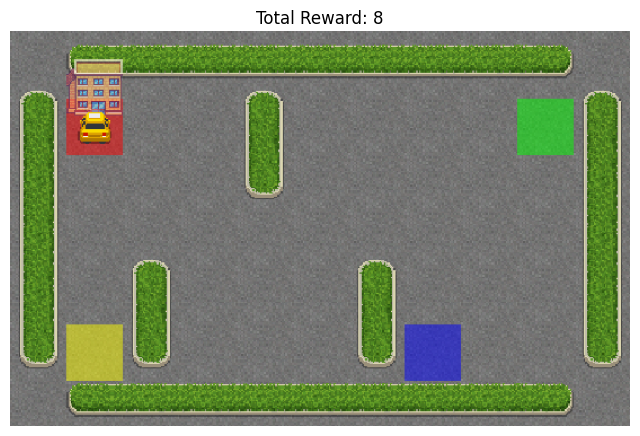

In [ ]:
import numpy as np
import random
import time
import gym
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from google.colab import drive

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Specify the path to your trained SARSA model file here
MODEL_PATH = "/content/drive/My Drive/SARSA_Taxi_v3_20241018_173225.npy"  # Update this path as needed

# Function to play the game
def play(path: str = MODEL_PATH,  # Use the specified model path
         slow: bool = False,
         render: bool = True,
         is_loop: bool = False,
         is_time: bool = False):
    env = gym.make("Taxi-v3")
    q_table = np.load(path)
    done = False
    result = 0
    state = env.reset()

    # Set up the figure for rendering
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots(figsize=(8, 8))

    steps = 0

    while not done:
        action = np.argmax(q_table[state])
        next_state, reward, done, _ = env.step(action)

        result += reward
        state = next_state

        # Render the current frame
        screen = env.render(mode='rgb_array')

        # Display the frame using Matplotlib
        ax.clear()
        ax.imshow(screen)
        ax.axis('off')  # Hide the axes
        plt.title(f'Total Reward: {result}')
        ipythondisplay.clear_output(wait=True)  # Clear previous frame
        ipythondisplay.display(plt.gcf())  # Display the current frame

        steps += 1

        # Delay for 1 second per frame
        time.sleep(1)

        if steps >= 100:
            break

        if slow:
            input("Press anything to continue...")
            print("\r", end="\r")

    # Clear the output to remove the last frame display
    ipythondisplay.clear_output(wait=True)  # Clear output once more to avoid final frame lingering

    env.close()  # Close the environment
    return steps, result

# Function to display data
def display_data(total, total_failed, start, mean_steps, mean_result):
    print()
    print(
        "[{} LOOP DONE - {}% FAILED - {} SECONDS] - Mean Steps Per Loop: {} - Mean Reward Per Loop: {} - Mean Time Per Loop : {}"
        .format(total, np.round(total_failed / total * 100, 2),
                np.round(time.time() - start, 4),
                np.round(mean_steps / total, 2),
                np.round(mean_result / total, 2),
                np.round((time.time() - start) / total, 6)))

# Function to solve the game
def solve(path, slow, render, mean_steps, mean_result, total_failed, is_loop,
          is_time):
    steps, result = play(path=path,
                         slow=slow,
                         render=render,
                         is_loop=is_loop,
                         is_time=is_time)
    mean_steps += steps
    mean_result += result
    if steps >= 100:
        total_failed += 1

    return mean_steps, mean_result, total_failed

# User-defined parameters
# Modify these parameters as needed
slow = False         # Set to True for slow mode
render = True        # Set to True to render the state
loop_count = 1       # Number of times to play the game
time_limit = 0       # Run play for x seconds, set to 0 for no time limit

# Start timing
start = time.time()
mean_steps, mean_result = 0, 0
total_failed = 0
is_loop = True if loop_count != 1 else False
maxrt = datetime.timedelta(seconds=time_limit) if time_limit != 0 else None

if maxrt is not None:
    stop = datetime.datetime.now() + maxrt
    total = 0

    while datetime.datetime.now() < stop:
        mean_steps, mean_result, total_failed = solve(
            MODEL_PATH, slow, render, mean_steps, mean_result,
            total_failed, is_loop, True)
        total += 1

    display_data(total, total_failed, start, mean_steps, mean_result)
else:
    for l in range(loop_count):
        mean_steps, mean_result, total_failed = solve(
            MODEL_PATH, slow, render, mean_steps, mean_result,
            total_failed, is_loop, False)

    if is_loop:
        display_data(loop_count, total_failed, start, mean_steps,
                     mean_result)
